In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.tsa.seasonal import seasonal_decompose

from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

trends = TrendReq()

Let's take a look at how people are searching for the Ukraine — where the news from Ukraine are the most popular and how did the search history change over time.

In [2]:
searchword = 'Ukraine'

First I will study the countries where people google Ukraine the most

In [3]:
trends.build_payload(kw_list=[searchword])
data = trends.interest_by_region()
data = data.sort_values(by=searchword, ascending=False)
top_20_data = data.head(20)
print(top_20_data)

                      Ukraine
geoName                      
Germany                   100
Uganda                     90
Ukraine                    90
Austria                    72
Ghana                      72
Nigeria                    68
Switzerland                68
Ireland                    63
Canada                     63
Kenya                      59
France                     59
Cyprus                     50
United Kingdom             50
Georgia                    50
Australia                  45
United Arab Emirates       45
South Africa               45
Singapore                  45
Denmark                    40
Lithuania                  40


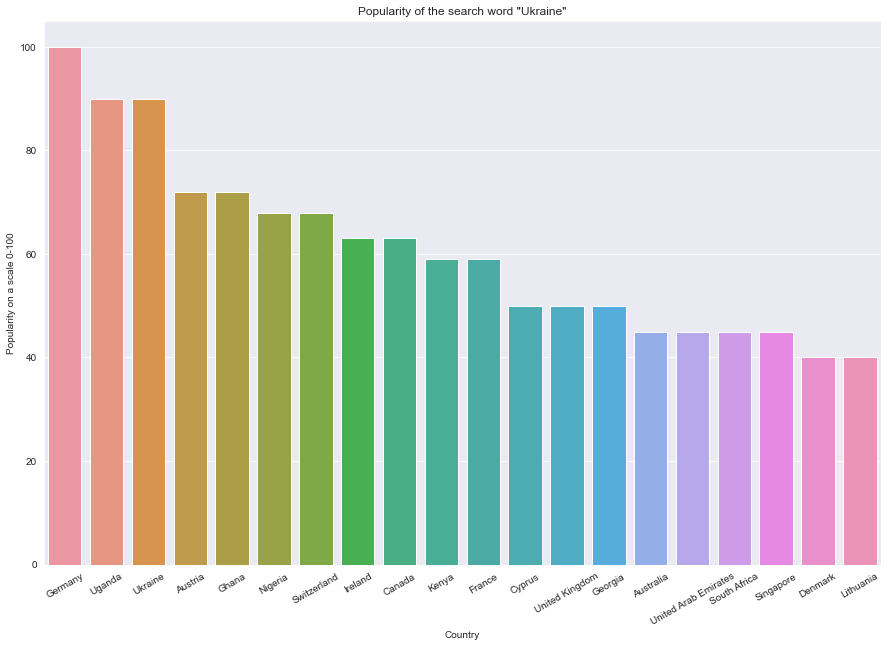

In [4]:
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=top_20_data.reset_index(), x='geoName', y=searchword)
ax.set_ylabel("Popularity on a scale 0-100")
ax.set_xlabel("Country")
plt.title('Popularity of the search word "'+searchword+'"')
plt.xticks(rotation=30)
plt.show()

Turns out that Ukrainian news are very popular in Germany — even slightly more popular compared to the Ukraine itself. It is very interesting to see that Uganda and Gnada are the next two countries — perhaps people there are really interested in what is going on in the country.

It is also interesting that there is no Russia in the top 20 list. I wonder what position does Russia hold in this list.

In [5]:
data.loc['Russia']

Ukraine    4
Name: Russia, dtype: int32

Ukraine news are almost at the bottom of the chart.
Maybe I should try to search for a Russian word for Ukraine — 'Украина'?

In [6]:
russian_searchword = 'Украина'
trends.build_payload(kw_list=[russian_searchword])
russian_data = trends.interest_by_region()
russian_data = russian_data.sort_values(by=russian_searchword, ascending=False)
russian_data = russian_data.head(20)
print(russian_data)

                          Украина
geoName                          
Ukraine                       100
Moldova                        14
Belarus                         8
Russia                          5
Estonia                         3
Latvia                          3
Kyrgyzstan                      3
Uzbekistan                      3
Kazakhstan                      3
Georgia                         2
Azerbaijan                      2
Czechia                         2
Israel                          2
Bulgaria                        1
Netherlands                     1
Poland                          1
Lithuania                       1
Norway                          0
Northern Mariana Islands        0
North Macedonia                 0


In [7]:
russian_data.columns

Index(['Украина'], dtype='object')

Here Russia is also near the bottom. Perhaps, people in Russia don't search for Ukraine that much these days.

Let's study how the total search count changed over the time — especially interesting to compare the data before the war announcement and after it.

I can also plot most important dates (like Bucha massacre public reveal or Mariupol theatre bombing) and see if the search count increases on these dates or not.

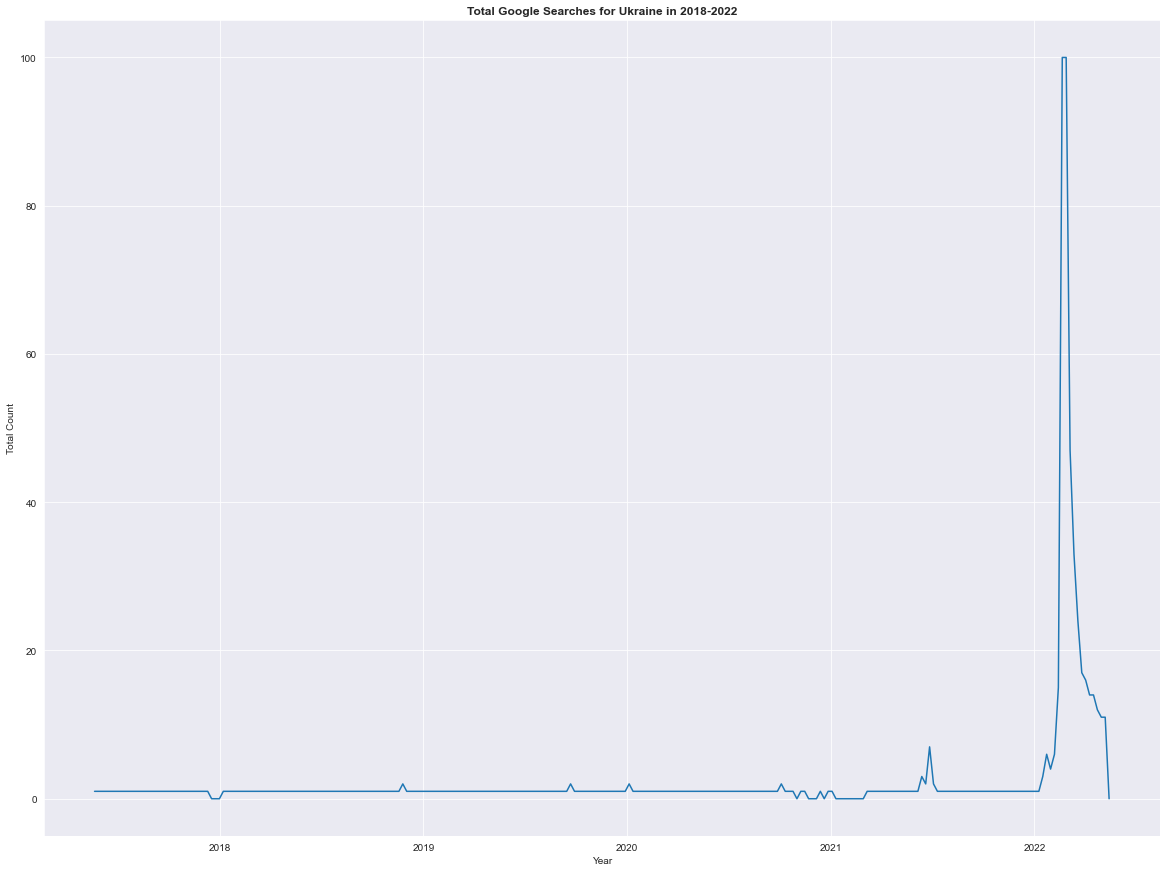

In [8]:
data = TrendReq(hl='en-US')
data.build_payload(kw_list=[searchword])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(data = data[searchword])
plt.title('Total Google Searches for Ukraine in 2018-2022', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

Let's check the May 2021 — May 2022 time period now

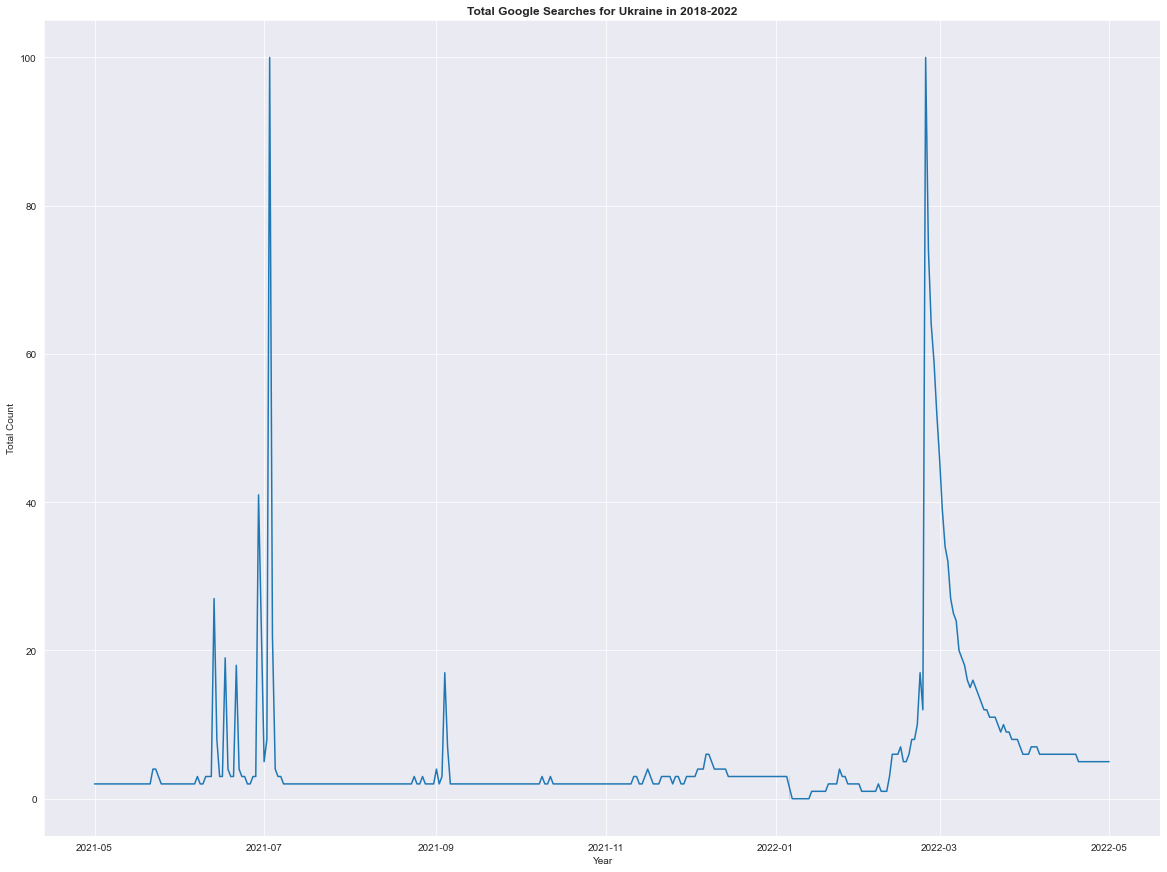

In [9]:
data = TrendReq(hl='en-US')
data = data.get_historical_interest([searchword], year_start=2021, 
                                    month_start=5, year_end=2022, 
                                    month_end=5, frequency='daily')

fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(data = data[searchword])
plt.title('Total Google Searches for Ukraine in 2018-2022', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

We can observe the spike of searches in Jupy 2021 and of course in February 2022.

I can suggest that it might have to do with the announcement of the countries' intentions to pursue closer relations with the European Union. Other main events can be found in [this wikipedia article](https://en.wikipedia.org/wiki/2021_in_Ukraine#July).

Let's take even closer look and map some of the key events on the chart to see whether they match with the popularity spikes.

The request failed: Google returned a response with code 400.


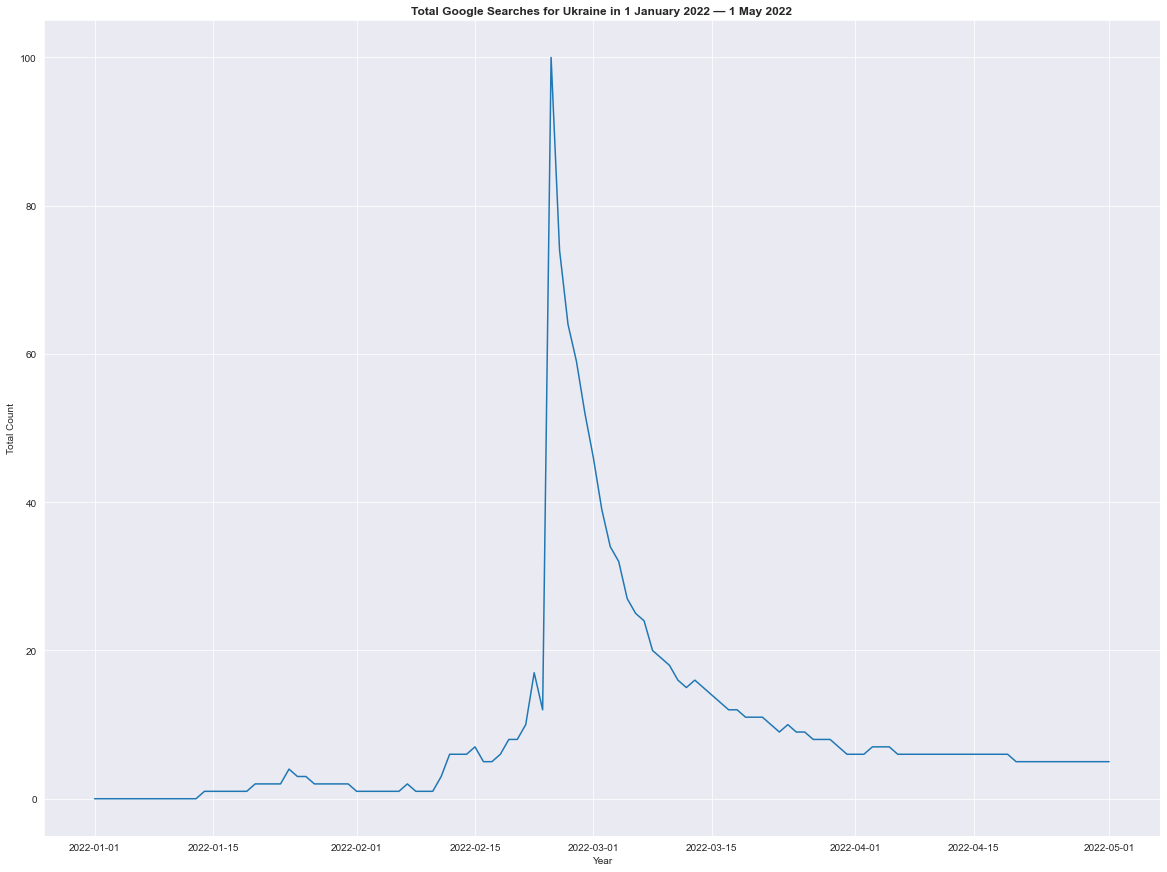

In [10]:
data = TrendReq(hl='en-US')
data = data.get_historical_interest([searchword], year_start=2022, 
                                    month_start=1, year_end=2022, 
                                    month_end=5, frequency='daily')

fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(data = data[searchword])
plt.title('Total Google Searches for Ukraine in 1 January 2022 — 1 May 2022', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

Let's now take a look at the hourly data and resample it to see the daily trends

In [11]:
data = TrendReq(hl='en-US')
data = data.get_historical_interest([searchword], year_start=2022, 
                                    month_start=1, year_end=2022, 
                                    month_end=5, frequency='hourly')
data = data.resample('24H').mean()

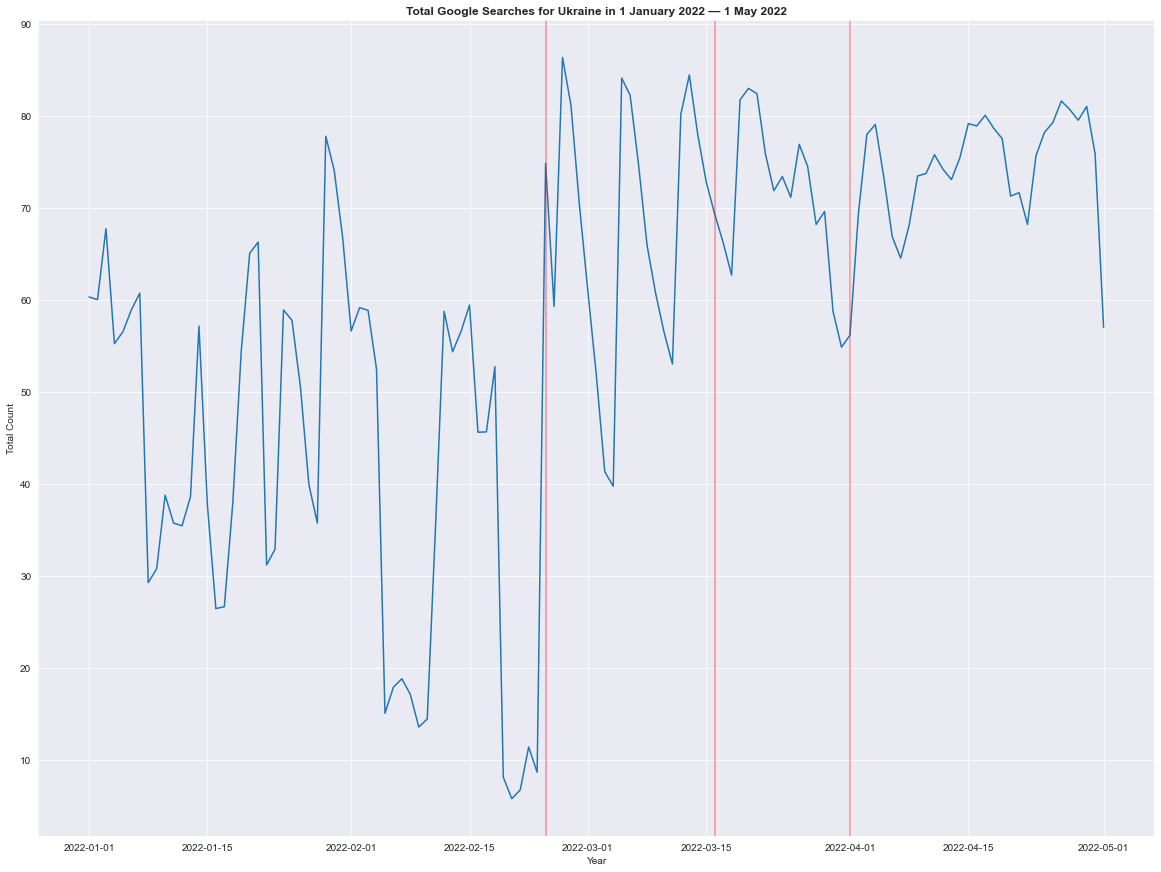

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(data = data[searchword])

plt.axvline(pd.Timestamp('2022-02-24'),color='r', alpha=0.4) #War began
plt.axvline(pd.Timestamp('2022-03-16'),color='r', alpha=0.4) #Mariupol theater strike
plt.axvline(pd.Timestamp('2022-04-01'),color='r', alpha=0.4) #Bucha massacre events made public

plt.title('Total Google Searches for Ukraine in 1 January 2022 — 1 May 2022', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

On the chart above we can see the spike on February 24 2022 — the day the war began.

Other important dates also match the coming spikes in the search count.

There is also a certain seasonality to data. 
I can suggest that it has to do with the fact that people read less news on weekends compared to weekdays. Let's examine it.

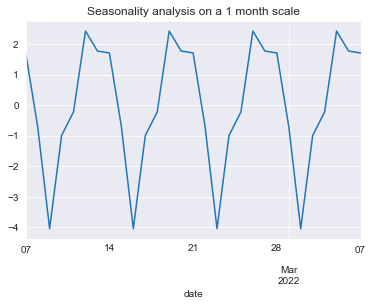

In [19]:
decomposed = seasonal_decompose(data.drop('isPartial', axis = 1))
decomposed.seasonal['2022-02-07':'2022-03-07'].plot()
plt.title('Seasonality analysis on a 1 month scale')
plt.show()

On a monthly scale the weekly seasonality becomes even more clear. Let's take a closer look.

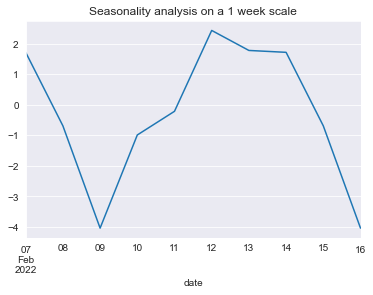

In [28]:
decomposed.seasonal['2022-02-07':'2022-02-16'].plot()
plt.title('Seasonality analysis on a 1 week scale')

plt.show()

Feb 7 is Monday and Feb 13 is Sunday.

Thus, according to the chart above, people tend to search for Ukraine the least on Monday — Wednesday period and the most near the end of the week.